In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Chargement des données
donnees_entrainement = pd.read_csv(r"C:\Users\rayan\Downloads\archive\train.csv")
donnees_test = pd.read_csv(r"C:\Users\rayan\Downloads\archive\test.csv")

print(donnees_entrainement.head())
print(donnees_test.head())



   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2               

In [3]:
# Préparation des données
X_entrainement = donnees_entrainement.drop('satisfaction', axis=1)
y_entrainement = donnees_entrainement['satisfaction']
X_evaluation = donnees_test.drop('satisfaction', axis=1)
y_evaluation = donnees_test['satisfaction'] 

# Encodage des caractéristiques catégorielles
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    frequencies = X_entrainement[col].value_counts().to_dict()
    X_entrainement[col] = X_entrainement[col].map(frequencies)
    X_evaluation[col] = X_evaluation[col].map(frequencies)

# Interpolation linéaire pour remplir les valeurs manquantes dans les jeux de données d'entraînement et de test
X_entrainement['Arrival Delay in Minutes'] = X_entrainement['Arrival Delay in Minutes'].interpolate(method='linear')
X_evaluation['Arrival Delay in Minutes'] = X_evaluation['Arrival Delay in Minutes'].interpolate(method='linear')


# Encodage des labels
# Création d'un dictionnaire qui mappe chaque classe à un entier unique
classe_map = {classe: idx for idx, classe in enumerate(sorted(set(y_entrainement)))}

# Fonction pour encoder les données
def encoder_labels(y, mapping):
    return y.apply(lambda classe: mapping[classe])

# Encodage des labels d'entraînement et de test
y_entrainement_encode = encoder_labels(y_entrainement, classe_map)
y_evaluation_encode = encoder_labels(y_evaluation, classe_map)


# Normalisation des données
from sklearn.preprocessing import MinMaxScaler

# Création du normalisateur Min-Max
normalisateur_min_max = MinMaxScaler()

# Adaptation du normalisateur aux données d'entraînement et transformation des données d'entraînement et de test
X_entrainement_normalise = normalisateur_min_max.fit_transform(X_entrainement)
X_evaluation_normalise = normalisateur_min_max.transform(X_evaluation)


X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X_entrainement_normalise, y_entrainement_encode, test_size=0.2, random_state=42)


In [4]:
#############################################
# Construction du modèle
modele = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_apprentissage.shape[1],), kernel_regularizer=regularizers.l2(0.00155)),  
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00155)),  
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

modele.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Utilisation de binary_crossentropy comme fonction de perte
    metrics=['accuracy']
)


##############################


Epoch 1/10


2598/2598 [==============================] - 5s 2ms/step - loss: 0.3360 - accuracy: 0.8921 - val_loss: 0.2504 - val_accuracy: 0.9259
Epoch 2/10
2598/2598 [==============================] - 4s 1ms/step - loss: 0.2331 - accuracy: 0.9263 - val_loss: 0.2197 - val_accuracy: 0.9312
Epoch 3/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.2080 - accuracy: 0.9341 - val_loss: 0.2017 - val_accuracy: 0.9314
Epoch 4/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1942 - accuracy: 0.9365 - val_loss: 0.1798 - val_accuracy: 0.9418
Epoch 5/10
2598/2598 [==============================] - 4s 1ms/step - loss: 0.1869 - accuracy: 0.9383 - val_loss: 0.1854 - val_accuracy: 0.9420
Epoch 6/10
2598/2598 [==============================] - 4s 1ms/step - loss: 0.1812 - accuracy: 0.9395 - val_loss: 0.1710 - val_accuracy: 0.9459
Epoch 7/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1766 - accuracy: 0.9407 - val_loss: 0.1654 - val_accurac

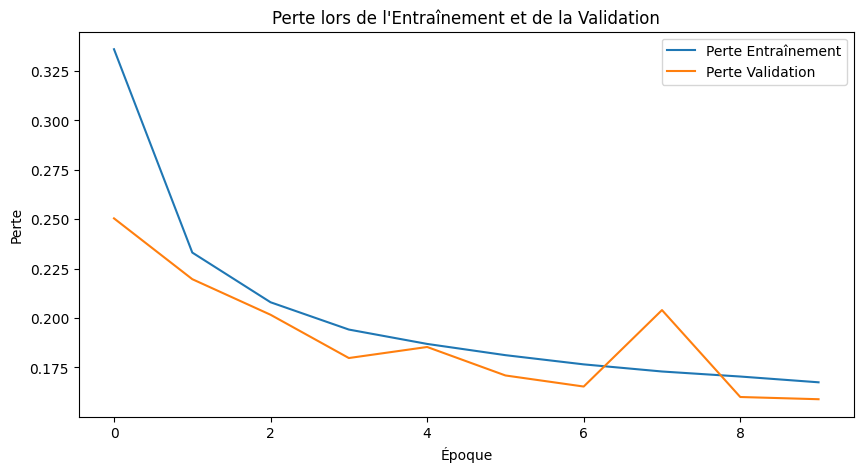

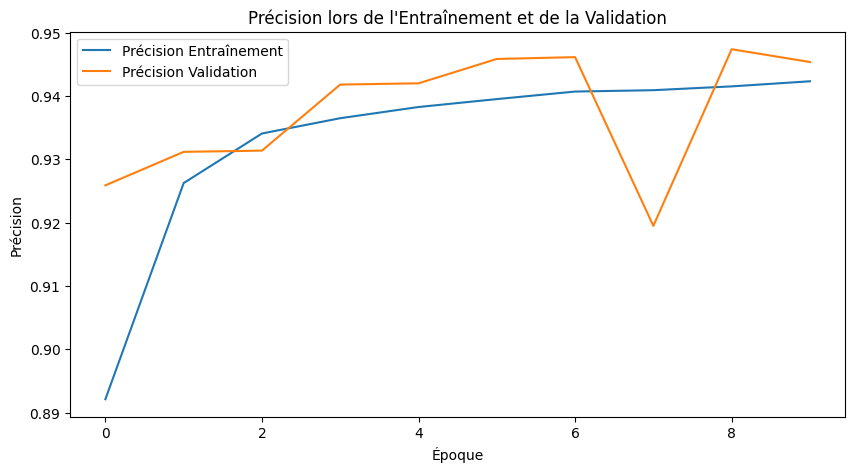

In [5]:
# Entraînement du modèle
historique = modele.fit(X_apprentissage, y_apprentissage, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))

# Visualisation de la performance du modèle
plt.figure(figsize=(10, 5))
plt.plot(historique.history['loss'], label='Perte Entraînement')
plt.plot(historique.history['val_loss'], label='Perte Validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Perte lors de l\'Entraînement et de la Validation')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(historique.history['accuracy'], label='Précision Entraînement')
plt.plot(historique.history['val_accuracy'], label='Précision Validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.title('Précision lors de l\'Entraînement et de la Validation')
plt.legend()
plt.show()


In [6]:
# Entraînement du modèle
print("\nDébut de l'entraînement du modèle...")
historique = modele.fit(X_apprentissage, y_apprentissage, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))



Début de l'entraînement du modèle...
Epoch 1/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1649 - accuracy: 0.9431 - val_loss: 0.1572 - val_accuracy: 0.9463
Epoch 2/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1630 - accuracy: 0.9443 - val_loss: 0.1572 - val_accuracy: 0.9483
Epoch 3/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1624 - accuracy: 0.9439 - val_loss: 0.1743 - val_accuracy: 0.9408
Epoch 4/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1601 - accuracy: 0.9449 - val_loss: 0.1554 - val_accuracy: 0.9446
Epoch 5/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1598 - accuracy: 0.9442 - val_loss: 0.1499 - val_accuracy: 0.9483
Epoch 6/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1580 - accuracy: 0.9448 - val_loss: 0.1732 - val_accuracy: 0.9360
Epoch 7/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1569 - accuracy: 0.9

In [7]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = modele.evaluate(X_evaluation_normalise, y_evaluation_encode)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


812/812 [==============================] - 1s 839us/step - loss: 0.1485 - accuracy: 0.9501
Test Loss: 0.14851181209087372
Test Accuracy: 0.9500693082809448
